# Advanced regression - Surprise Housing Price Prediction - Upgrad
## Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know, Which variables are significant in predicting the price of a house, and

* How well those variables describe the price of a house.
* Also, determine the optimal value of lambda for ridge and lasso regression 


### Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

To Predict the cnt (Y_Pred)

# Steps involved
- Load/Read Data
- Basic inspection and understanding the Data
- EDA (Missing Values, Outlier, duplicates, visualization, Add/drop features
- Train - Test split
- Scaling
- Modeling
- Tuning with Regularization (Ridge & Lasso)
- Model Evaluation
- Conculsion 

##### By Khaleel

## Importing required libraries and warnings

In [847]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [848]:
# to see all the columns and rows if needed
pd.set_option('display.max_rows', 40, 'display.max_columns', 82)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

## 1.0 Reading the data

In [849]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2.0 Performing basic checks for understanding the data

In [850]:
df.shape
#Data contains 1460 records with 81 variables

(1460, 81)

In [851]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [852]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.00","1,460.00","1,201.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,452.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,379.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,730.50,56.90,70.05,"10,516.83",6.10,5.58,"1,971.27","1,984.87",103.69,443.64,46.55,567.24,"1,057.43","1,162.63",346.99,5.84,"1,515.46",0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,"1,978.51",1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,"2,007.82","180,921.20"
std,421.61,42.30,24.28,"9,981.26",1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,"79,442.50"
min,1.00,20.00,21.00,"1,300.00",1.00,1.00,"1,872.00","1,950.00",0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,"1,900.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,006.00","34,900.00"
25%,365.75,20.00,59.00,"7,553.50",5.00,5.00,"1,954.00","1,967.00",0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,"1,129.50",0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,"1,961.00",1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","129,975.00"
50%,730.50,50.00,69.00,"9,478.50",6.00,5.00,"1,973.00","1,994.00",0.00,383.50,0.00,477.50,991.50,"1,087.00",0.00,0.00,"1,464.00",0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,"1,980.00",2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,"2,008.00","163,000.00"
75%,"1,095.25",70.00,80.00,"11,601.50",7.00,6.00,"2,000.00","2,004.00",166.00,712.25,0.00,808.00,"1,298.25","1,391.25",728.00,0.00,"1,776.75",1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,"2,002.00",2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,009.00","214,000.00"
max,"1,460.00",190.00,313.00,"215,245.00",10.00,9.00,"2,010.00","2,010.00","1,600.00","5,644.00","1,474.00","2,336.00","6,110.00","4,692.00","2,065.00",572.00,"5,642.00",3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,"2,010.00",4.00,"1,418.00",857.00,547.00,552.00,508.00,480.00,738.00,"15,500.00",12.00,"2,010.00","755,000.00"


In [853]:
# Drop unique columns id, not signification for data
df=df.drop('Id',axis=1)

In [854]:
#Get Percentage of null values(NA) in data columns and sort by highest
nullvalue = (df.isnull().sum()/df.shape[0])*100
nullvalue[nullvalue > 0].sort_values(ascending=False)

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
LotFrontage    17.74
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64

In [855]:
#df[df['GarageCars'].isin([0])]

In [856]:
#Get Percentage of Zero values(0) in data columns and sort by highest
Zerovalue = (df.isin([0]).sum()/df.shape[0])*100
Zerovalue[Zerovalue > 0].sort_values(ascending=False)

PoolArea        99.52
3SsnPorch       98.36
LowQualFinSF    98.22
MiscVal         96.44
BsmtHalfBath    94.38
ScreenPorch     92.05
BsmtFinSF2      88.56
EnclosedPorch   85.75
HalfBath        62.53
MasVnrArea      58.97
BsmtFullBath    58.63
2ndFlrSF        56.78
WoodDeckSF      52.12
Fireplaces      47.26
OpenPorchSF     44.93
BsmtFinSF1      31.99
BsmtUnfSF        8.08
GarageCars       5.55
GarageArea       5.55
TotalBsmtSF      2.53
FullBath         0.62
BedroomAbvGr     0.41
KitchenAbvGr     0.07
dtype: float64

In [857]:
#Find any datetime feature in data
df[['YearBuilt','YearRemodAdd','MoSold','YrSold']]

,YearBuilt,YearRemodAdd,MoSold,YrSold
0,2003,2003,2,2008
1,1976,1976,5,2007
2,2001,2002,9,2008
3,1915,1970,2,2006
4,2000,2000,12,2008
...,...,...,...,...
1455,1999,2000,8,2007
1456,1978,1988,2,2010
1457,1941,2006,5,2010
1458,1950,1996,4,2010


## EDA and Data Visualization

- Perform EDA to understand various variables.
- Check any correlation between the variables, exist.
- Impute data for missing values, if data is correlate to predict value
- Drop the unneccassary variables like missing values, Outlier, duplicates, etc.


### Add the Dreive columns form build & sold date and drop the original columns

In [858]:
# Find the house age from yearsold - yearbuilt and add the drive metrics
df['Age'] = (df['YrSold'] - df['YearBuilt'])

In [859]:
# find the house rebuilt or modified from YearRemodAdd - YearBuilt and add the drive metrics catagorical yes/no if 0 or >0
df["rebuilt"] = df[["YearRemodAdd", "YearBuilt"]].apply(
    lambda x: "Yes"
    if ((x.YearRemodAdd - x.YearBuilt) > 0)
    else "No",
    axis=1
)

In [860]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age,rebuilt
0,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5,No
1,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31,No
2,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7,Yes
3,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91,Yes
4,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8,No


In [861]:
#Drop the original built and sold column feature
df = df.drop(['MoSold'], axis = 1)
df = df.drop(['YrSold'], axis = 1)
df = df.drop(['YearBuilt'], axis = 1)
df = df.drop(['YearRemodAdd'], axis = 1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Age,rebuilt
0,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,208500,5,No
1,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,181500,31,No
2,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,223500,7,Yes
3,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,WD,Abnorml,140000,91,Yes
4,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,250000,8,No


#### Dropping the columns having highest Zero values with cutoff of 44% and higher. Where seen in the above steps

In [862]:
df = df.loc[:,~(df.isin([0]).sum()/df.shape[0]>0.44)]

In [863]:
df.shape

(1460, 63)

In [864]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,Age,rebuilt
0,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,1710,2,3,1,Gd,8,Typ,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500,5,No
1,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,1262,2,3,1,TA,6,Typ,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500,31,No
2,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,1786,2,3,1,Gd,6,Typ,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500,7,Yes
3,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,1717,1,3,1,Gd,7,Typ,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000,91,Yes
4,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,2198,2,4,1,Gd,9,Typ,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000,8,No


####  Dropping the columns having highest null values with cutoff of 45% and higher

In [865]:
df = df.loc[:,~(df.isnull().sum()/df.shape[0]>0.45)]

In [866]:
df.shape

(1460, 58)

In [867]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice,Age,rebuilt
0,60,RL,65.00,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,1710,2,3,1,Gd,8,Typ,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,WD,Normal,208500,5,No
1,20,RL,80.00,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,1262,2,3,1,TA,6,Typ,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,WD,Normal,181500,31,No
2,60,RL,68.00,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,1786,2,3,1,Gd,6,Typ,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,WD,Normal,223500,7,Yes
3,70,RL,60.00,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,1717,1,3,1,Gd,7,Typ,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,WD,Abnorml,140000,91,Yes
4,60,RL,84.00,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,2198,2,4,1,Gd,9,Typ,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,WD,Normal,250000,8,No


## Create a list of variabales based on dtypes for Data analysis

In [868]:
# Define all float and int dtype into df_numeric subset and print list of columns
df_numeric=df.select_dtypes(include=['float64', 'int64'])
print(list(df_numeric.columns))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice', 'Age']


In [869]:
# Define all object(catagorical)dtype into df_catagories subset and print list of columns
df_catagories=df.select_dtypes(include=['object'])
print(list(df_catagories.columns))

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'rebuilt']


## Impute the Zero values present in the Data for Numerical & catagorical features

In [870]:
#Check the Percentage of Zero values(0) in the rest of data columns and sort by highest for impute, if any
Zerovalue = (df.isin([0]).sum()/df.shape[0])*100
Zerovalue[Zerovalue > 0].sort_values(ascending=False)

BsmtFinSF1     31.99
BsmtUnfSF       8.08
GarageCars      5.55
GarageArea      5.55
Age             4.38
TotalBsmtSF     2.53
FullBath        0.62
BedroomAbvGr    0.41
KitchenAbvGr    0.07
dtype: float64

## Impute the NaN values present in the Data for Numerical & catagorical features

In [871]:
#Check the Percentage of null values(NA) in rest of data columns and sort by highest for impute
nullvalue = (df.isnull().sum()/df.shape[0])*100
nullvalue[nullvalue > 0].sort_values(ascending=False)

LotFrontage    17.74
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrType      0.55
Electrical      0.07
dtype: float64

In [872]:
obj = nullvalue[nullvalue > 0].sort_values(ascending=False)
result = ""
for key,value in obj.iteritems():
    result = "'" + key + "'" + "," + result
    
print(result)

'Electrical','MasVnrType','BsmtFinType1','BsmtCond','BsmtQual','BsmtFinType2','BsmtExposure','GarageCond','GarageQual','GarageFinish','GarageYrBlt','GarageType','LotFrontage',


#### Impute the NA values for rest of missing colums.

In [873]:
#Checking Missing columns featrure
df[['Electrical','MasVnrType','BsmtFinType1','BsmtCond','BsmtQual','BsmtFinType2','BsmtExposure','GarageCond','GarageQual','GarageFinish','GarageYrBlt','GarageType','LotFrontage']].describe(percentiles=[.25,.5,.75,.90,.95,.99],include ='all')

,Electrical,MasVnrType,BsmtFinType1,BsmtCond,BsmtQual,BsmtFinType2,BsmtExposure,GarageCond,GarageQual,GarageFinish,GarageYrBlt,GarageType,LotFrontage
count,1459,1452,1423,1423,1423,1422,1422,1379,1379,1379,"1,379.00",1379,"1,201.00"
unique,5,4,6,4,4,6,4,5,5,3,NaN,6,NaN
top,SBrkr,None,Unf,TA,TA,Unf,No,TA,TA,Unf,NaN,Attchd,NaN
freq,1334,864,430,1311,649,1256,953,1326,1311,605,NaN,870,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,978.51",NaN,70.05
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.69,NaN,24.28
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,900.00",NaN,21.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,961.00",NaN,59.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,980.00",NaN,69.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,002.00",NaN,80.00


In [874]:
#Checking featrure by numeric filter
df[['Electrical','MasVnrType','BsmtFinType1','BsmtCond','BsmtQual','BsmtFinType2','BsmtExposure','GarageCond','GarageQual','GarageFinish','GarageYrBlt','GarageType','LotFrontage']].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,GarageYrBlt,LotFrontage
count,"1,379.00","1,201.00"
mean,"1,978.51",70.05
std,24.69,24.28
min,"1,900.00",21.00
25%,"1,961.00",59.00
50%,"1,980.00",69.00
75%,"2,002.00",80.00
90%,"2,006.00",96.00
95%,"2,007.00",107.00
99%,"2,009.00",141.00


## Impute the  NaN numerical features

In [875]:
# Replacing the NaN value with mean for features and median incase of outliners for MasVnrArea
df.LotFrontage.fillna((df.LotFrontage.mean()), inplace = True)
df.GarageYrBlt.fillna((df.GarageYrBlt.mean()), inplace = True)


## Impute the  NaN catagorical features

In [876]:
# Replace the NA with No Basement for features BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
df.BsmtQual.fillna("No Basement", inplace = True)
df.BsmtCond.fillna("No Basement", inplace = True)
df.BsmtExposure.fillna("No Basement", inplace = True)
df.BsmtFinType1.fillna("No Basement", inplace = True)
df.BsmtFinType2.fillna("No Basement", inplace = True)
# Replace the NA with No Garage for features GarageType, GarageFinish, GarageQual, GarageCond
df.GarageType.fillna("No Garage", inplace = True)
df.GarageFinish.fillna("No Garage", inplace = True)
df.GarageQual.fillna("No Garage", inplace = True)
df.GarageCond.fillna("No Garage", inplace = True)
# Replace the records which are having NA for features 'MasVnrType', 'Electrical' with none value.
df.MasVnrType.fillna("None", inplace = True)
df.Electrical.fillna("None", inplace = True)

In [877]:
#Check Percentage of null values(NA) if still exist in the data
nullvalue = (df.isnull().sum()/df.shape[0])*100
nullvalue[nullvalue > 0].sort_values(ascending=False)

Series([], dtype: float64)

#### Checking the continuous numerical variables

In [878]:
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice,Age
0,60,65.00,8450,7,5,706,150,856,856,1710,2,3,1,8,"2,003.00",2,548,208500,5
1,20,80.00,9600,6,8,978,284,1262,1262,1262,2,3,1,6,"1,976.00",2,460,181500,31
2,60,68.00,11250,7,5,486,434,920,920,1786,2,3,1,6,"2,001.00",2,608,223500,7
3,70,60.00,9550,7,5,216,540,756,961,1717,1,3,1,7,"1,998.00",3,642,140000,91
4,60,84.00,14260,8,5,655,490,1145,1145,2198,2,4,1,9,"2,000.00",3,836,250000,8


In [879]:
df_numeric.describe(include='all')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice,Age
count,"1,460.00","1,201.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,379.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,56.90,70.05,"10,516.83",6.10,5.58,443.64,567.24,"1,057.43","1,162.63","1,515.46",1.57,2.87,1.05,6.52,"1,978.51",1.77,472.98,"180,921.20",36.55
std,42.30,24.28,"9,981.26",1.38,1.11,456.10,441.87,438.71,386.59,525.48,0.55,0.82,0.22,1.63,24.69,0.75,213.80,"79,442.50",30.25
min,20.00,21.00,"1,300.00",1.00,1.00,0.00,0.00,0.00,334.00,334.00,0.00,0.00,0.00,2.00,"1,900.00",0.00,0.00,"34,900.00",0.00
25%,20.00,59.00,"7,553.50",5.00,5.00,0.00,223.00,795.75,882.00,"1,129.50",1.00,2.00,1.00,5.00,"1,961.00",1.00,334.50,"129,975.00",8.00
50%,50.00,69.00,"9,478.50",6.00,5.00,383.50,477.50,991.50,"1,087.00","1,464.00",2.00,3.00,1.00,6.00,"1,980.00",2.00,480.00,"163,000.00",35.00
75%,70.00,80.00,"11,601.50",7.00,6.00,712.25,808.00,"1,298.25","1,391.25","1,776.75",2.00,3.00,1.00,7.00,"2,002.00",2.00,576.00,"214,000.00",54.00
max,190.00,313.00,"215,245.00",10.00,9.00,"5,644.00","2,336.00","6,110.00","4,692.00","5,642.00",3.00,8.00,3.00,14.00,"2,010.00",4.00,"1,418.00","755,000.00",136.00


In [880]:
# Check the unique values present in the numeric feature variable to treat as catagorical object for dummy
unique = df_numeric.nunique(axis=0).sort_values()
unique

KitchenAbvGr       4
FullBath           4
GarageCars         5
BedroomAbvGr       8
OverallCond        9
OverallQual       10
TotRmsAbvGrd      12
MSSubClass        15
GarageYrBlt       97
LotFrontage      110
Age              122
GarageArea       441
BsmtFinSF1       637
SalePrice        663
TotalBsmtSF      721
1stFlrSF         753
BsmtUnfSF        780
GrLivArea        861
LotArea         1073
dtype: int64

In [881]:
#From seeing Data that there are few variables which are order catagorical type which is treated as numerical variables 
# needs to be converted them as categorical variables. So we are droping those columns from df_numeric DataFrame
# dropping the columns we want to treat as categorical variables
df_numeric = df_numeric.drop(['FullBath','KitchenAbvGr','GarageCars','BedroomAbvGr','OverallCond','OverallQual','TotRmsAbvGrd','MSSubClass'], axis=1)
df_numeric.head()

,LotFrontage,LotArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,GarageArea,SalePrice,Age
0,65.00,8450,706,150,856,856,1710,"2,003.00",548,208500,5
1,80.00,9600,978,284,1262,1262,1262,"1,976.00",460,181500,31
2,68.00,11250,486,434,920,920,1786,"2,001.00",608,223500,7
3,60.00,9550,216,540,756,961,1717,"1,998.00",642,140000,91
4,84.00,14260,655,490,1145,1145,2198,"2,000.00",836,250000,8


In [882]:
numerical_col=df_numeric.columns
numerical_col

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice',
       'Age'],
      dtype='object')

In [883]:
# Convert the dropped columns to object type and add to the catagorical data sub set
# Converting numerical to categorical type
df.FullBath = df.FullBath.astype('object')
df.KitchenAbvGr = df.KitchenAbvGr.astype('object')
df.GarageCars = df.GarageCars.astype('object')
df.BedroomAbvGr = df.BedroomAbvGr.astype('object')
df.OverallQual = df.OverallQual.astype('object')
df.OverallCond = df.OverallCond.astype('object')
df.TotRmsAbvGrd = df.TotRmsAbvGrd.astype('object')
df.MSSubClass = df.MSSubClass.astype('object')
# redefine to the exisiting data set 
df_catagories=df.select_dtypes(include=['object'])
print(list(df_catagories.columns))

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'rebuilt']


## Data Visulization for more understanding the Data

In [884]:
df.shape

(1460, 58)

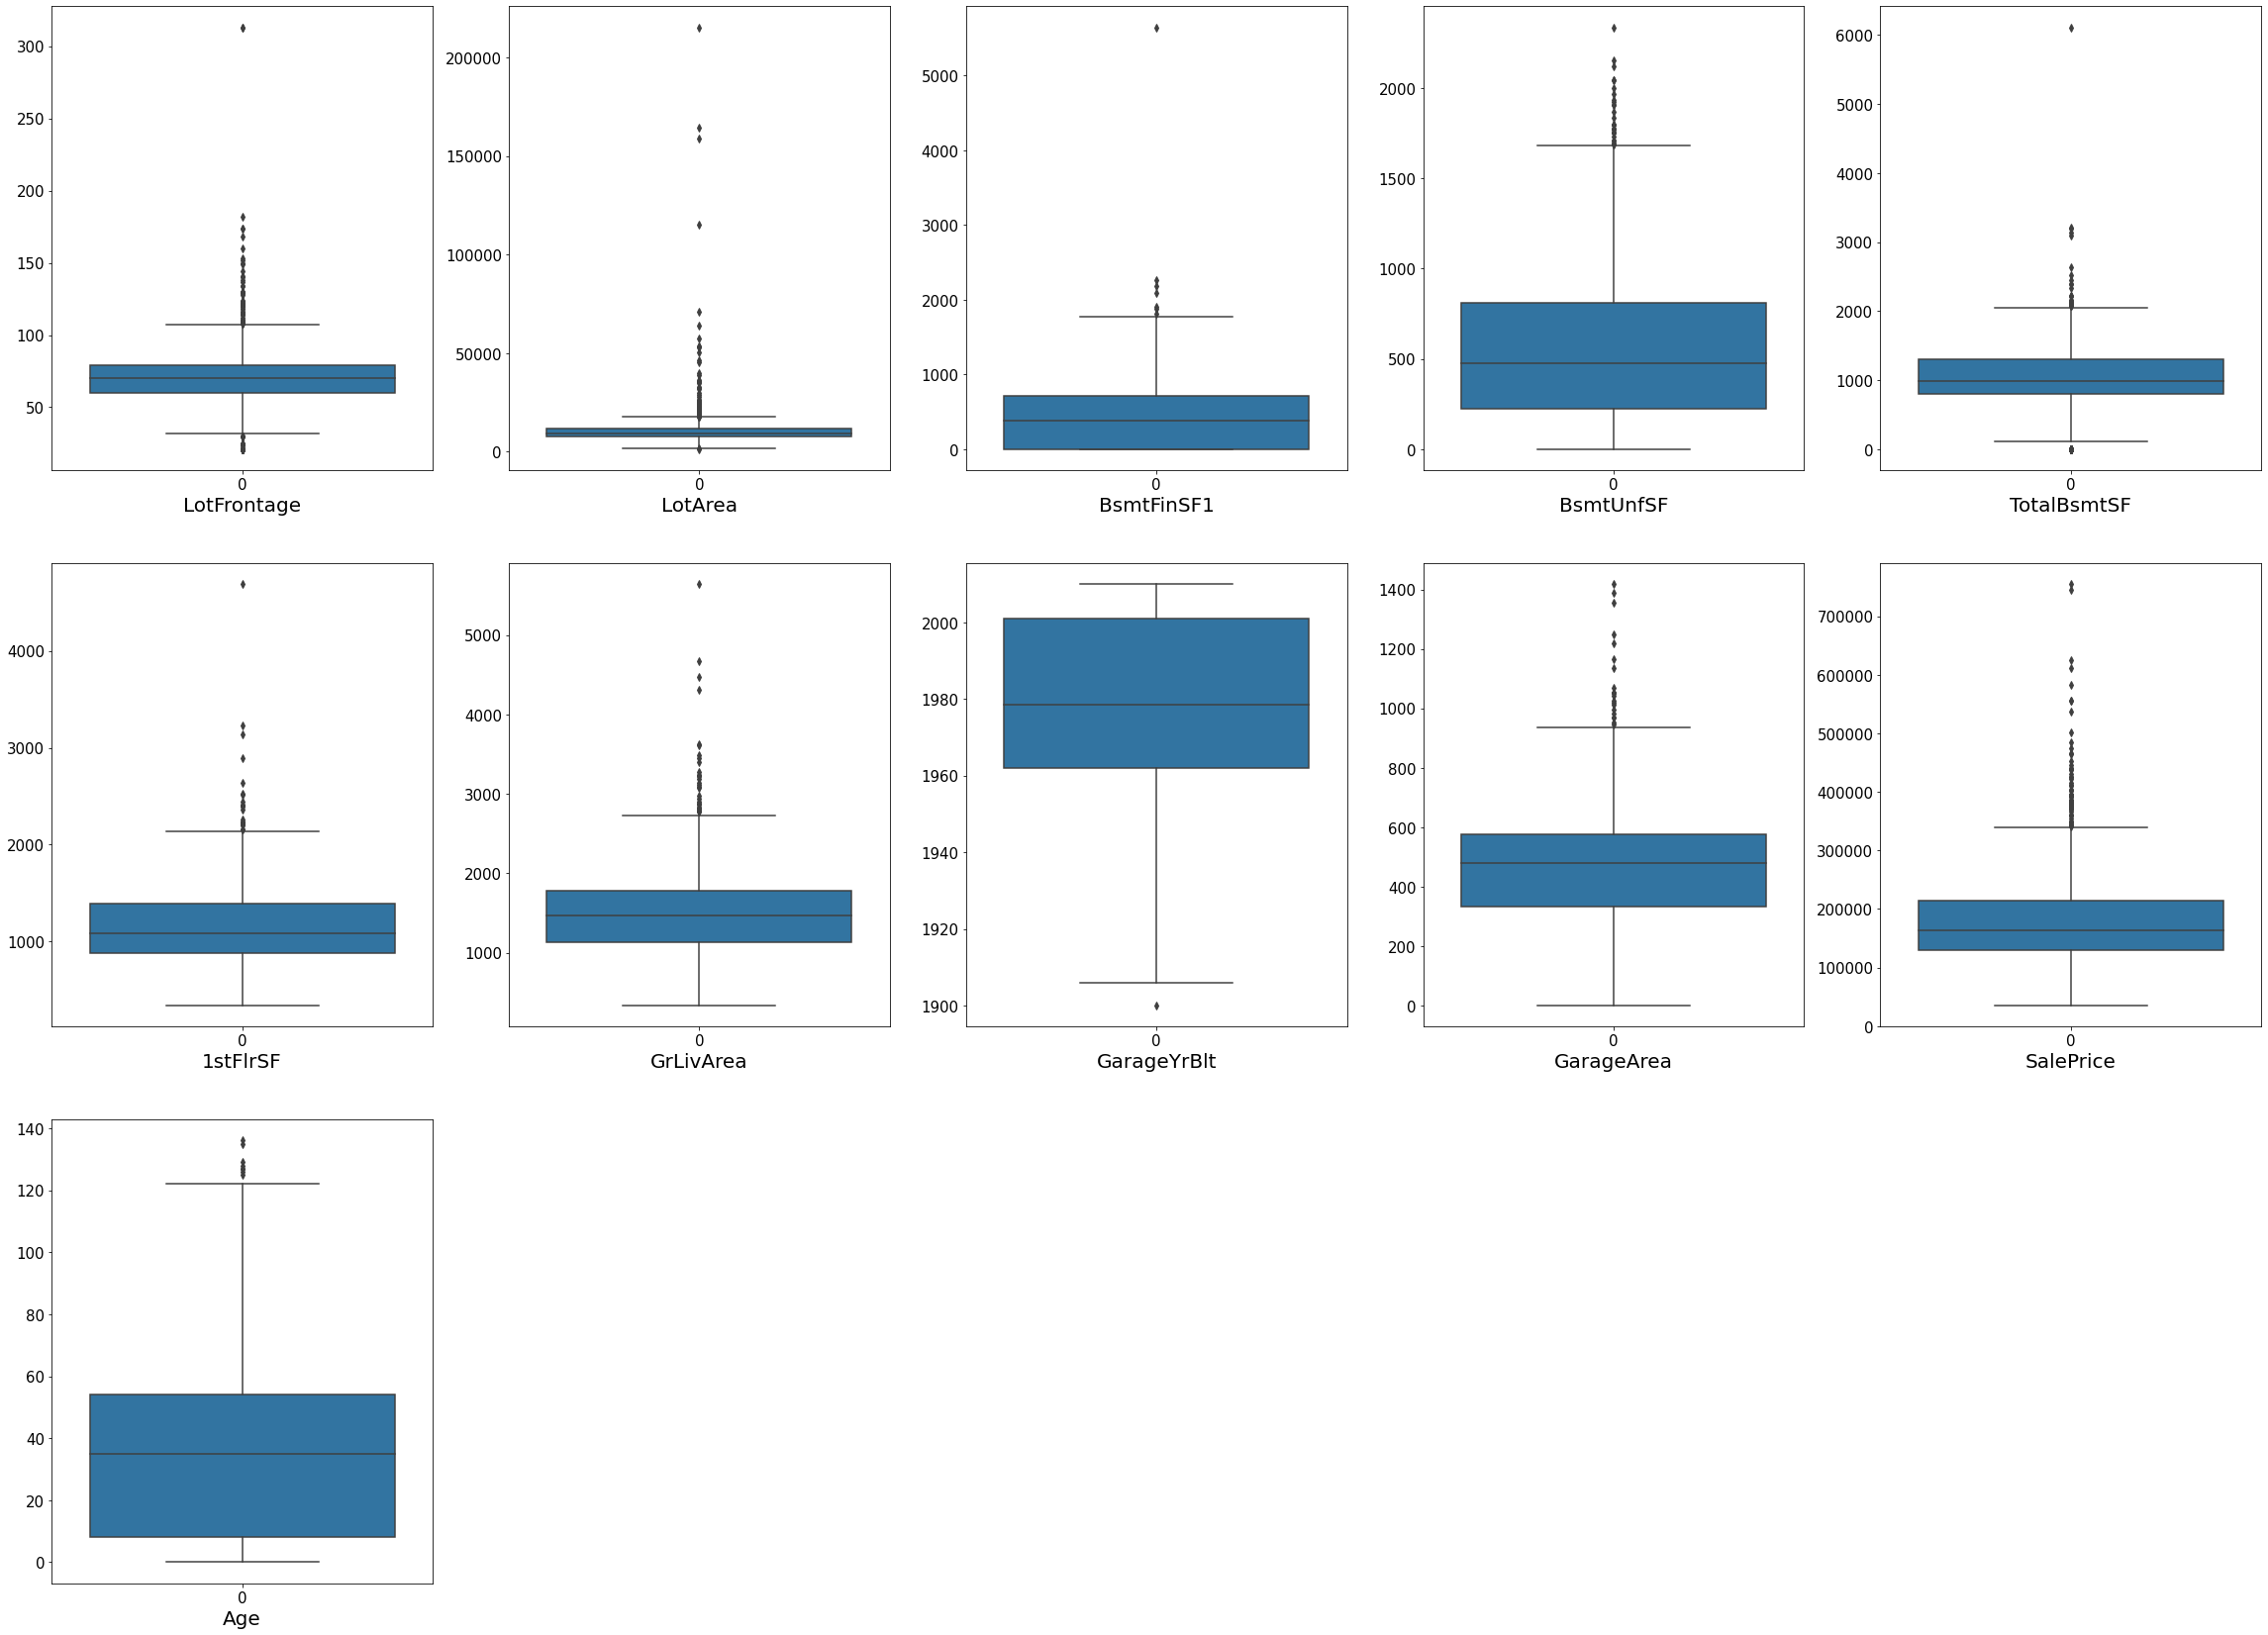

In [885]:
plt.figure(figsize=(40,50))
for i in range(len(numerical_col)):
    plt.subplot(5,5,i+1)
    sns.boxplot(data = df[numerical_col[i]])
    plt.xlabel(numerical_col[i],fontdict={'fontsize':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.show()

### From Box plot we able to find that there are outliers in out dataset.

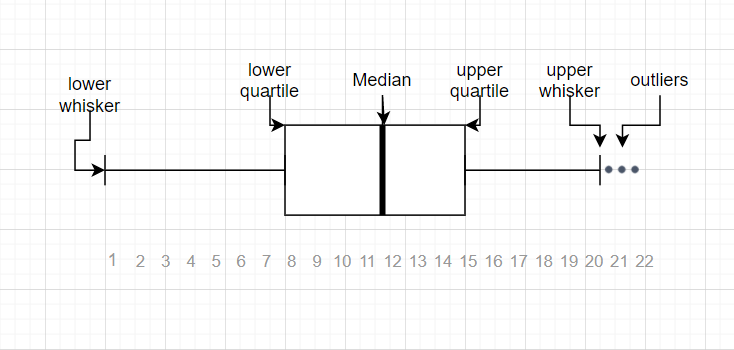
1.5 IQR Rule

Steps in 1.5IQR rule:-

Finding the median, quartile, and interquartile regions
Calculate 1.5*IQR below the first quartile and check for low outliers.
Calculate 1.5*IQR above the third quartile and check for outliers.
Drop rows of outliers from data analysis

In [886]:
# find the IQR Rule and drop the outliers from dataset
for i in range(len(numerical_col)):
    Q1=df[numerical_col[i]].quantile(0.0)
    Q3=df[numerical_col[i]].quantile(0.90)
    IQR=Q3-Q1
    df=df[(df[numerical_col[i]] >= Q1 - 1.5*IQR) & 
                          (df[numerical_col[i]] <= Q3 + 1.5*IQR)]

In [887]:
df.shape

(1438, 58)

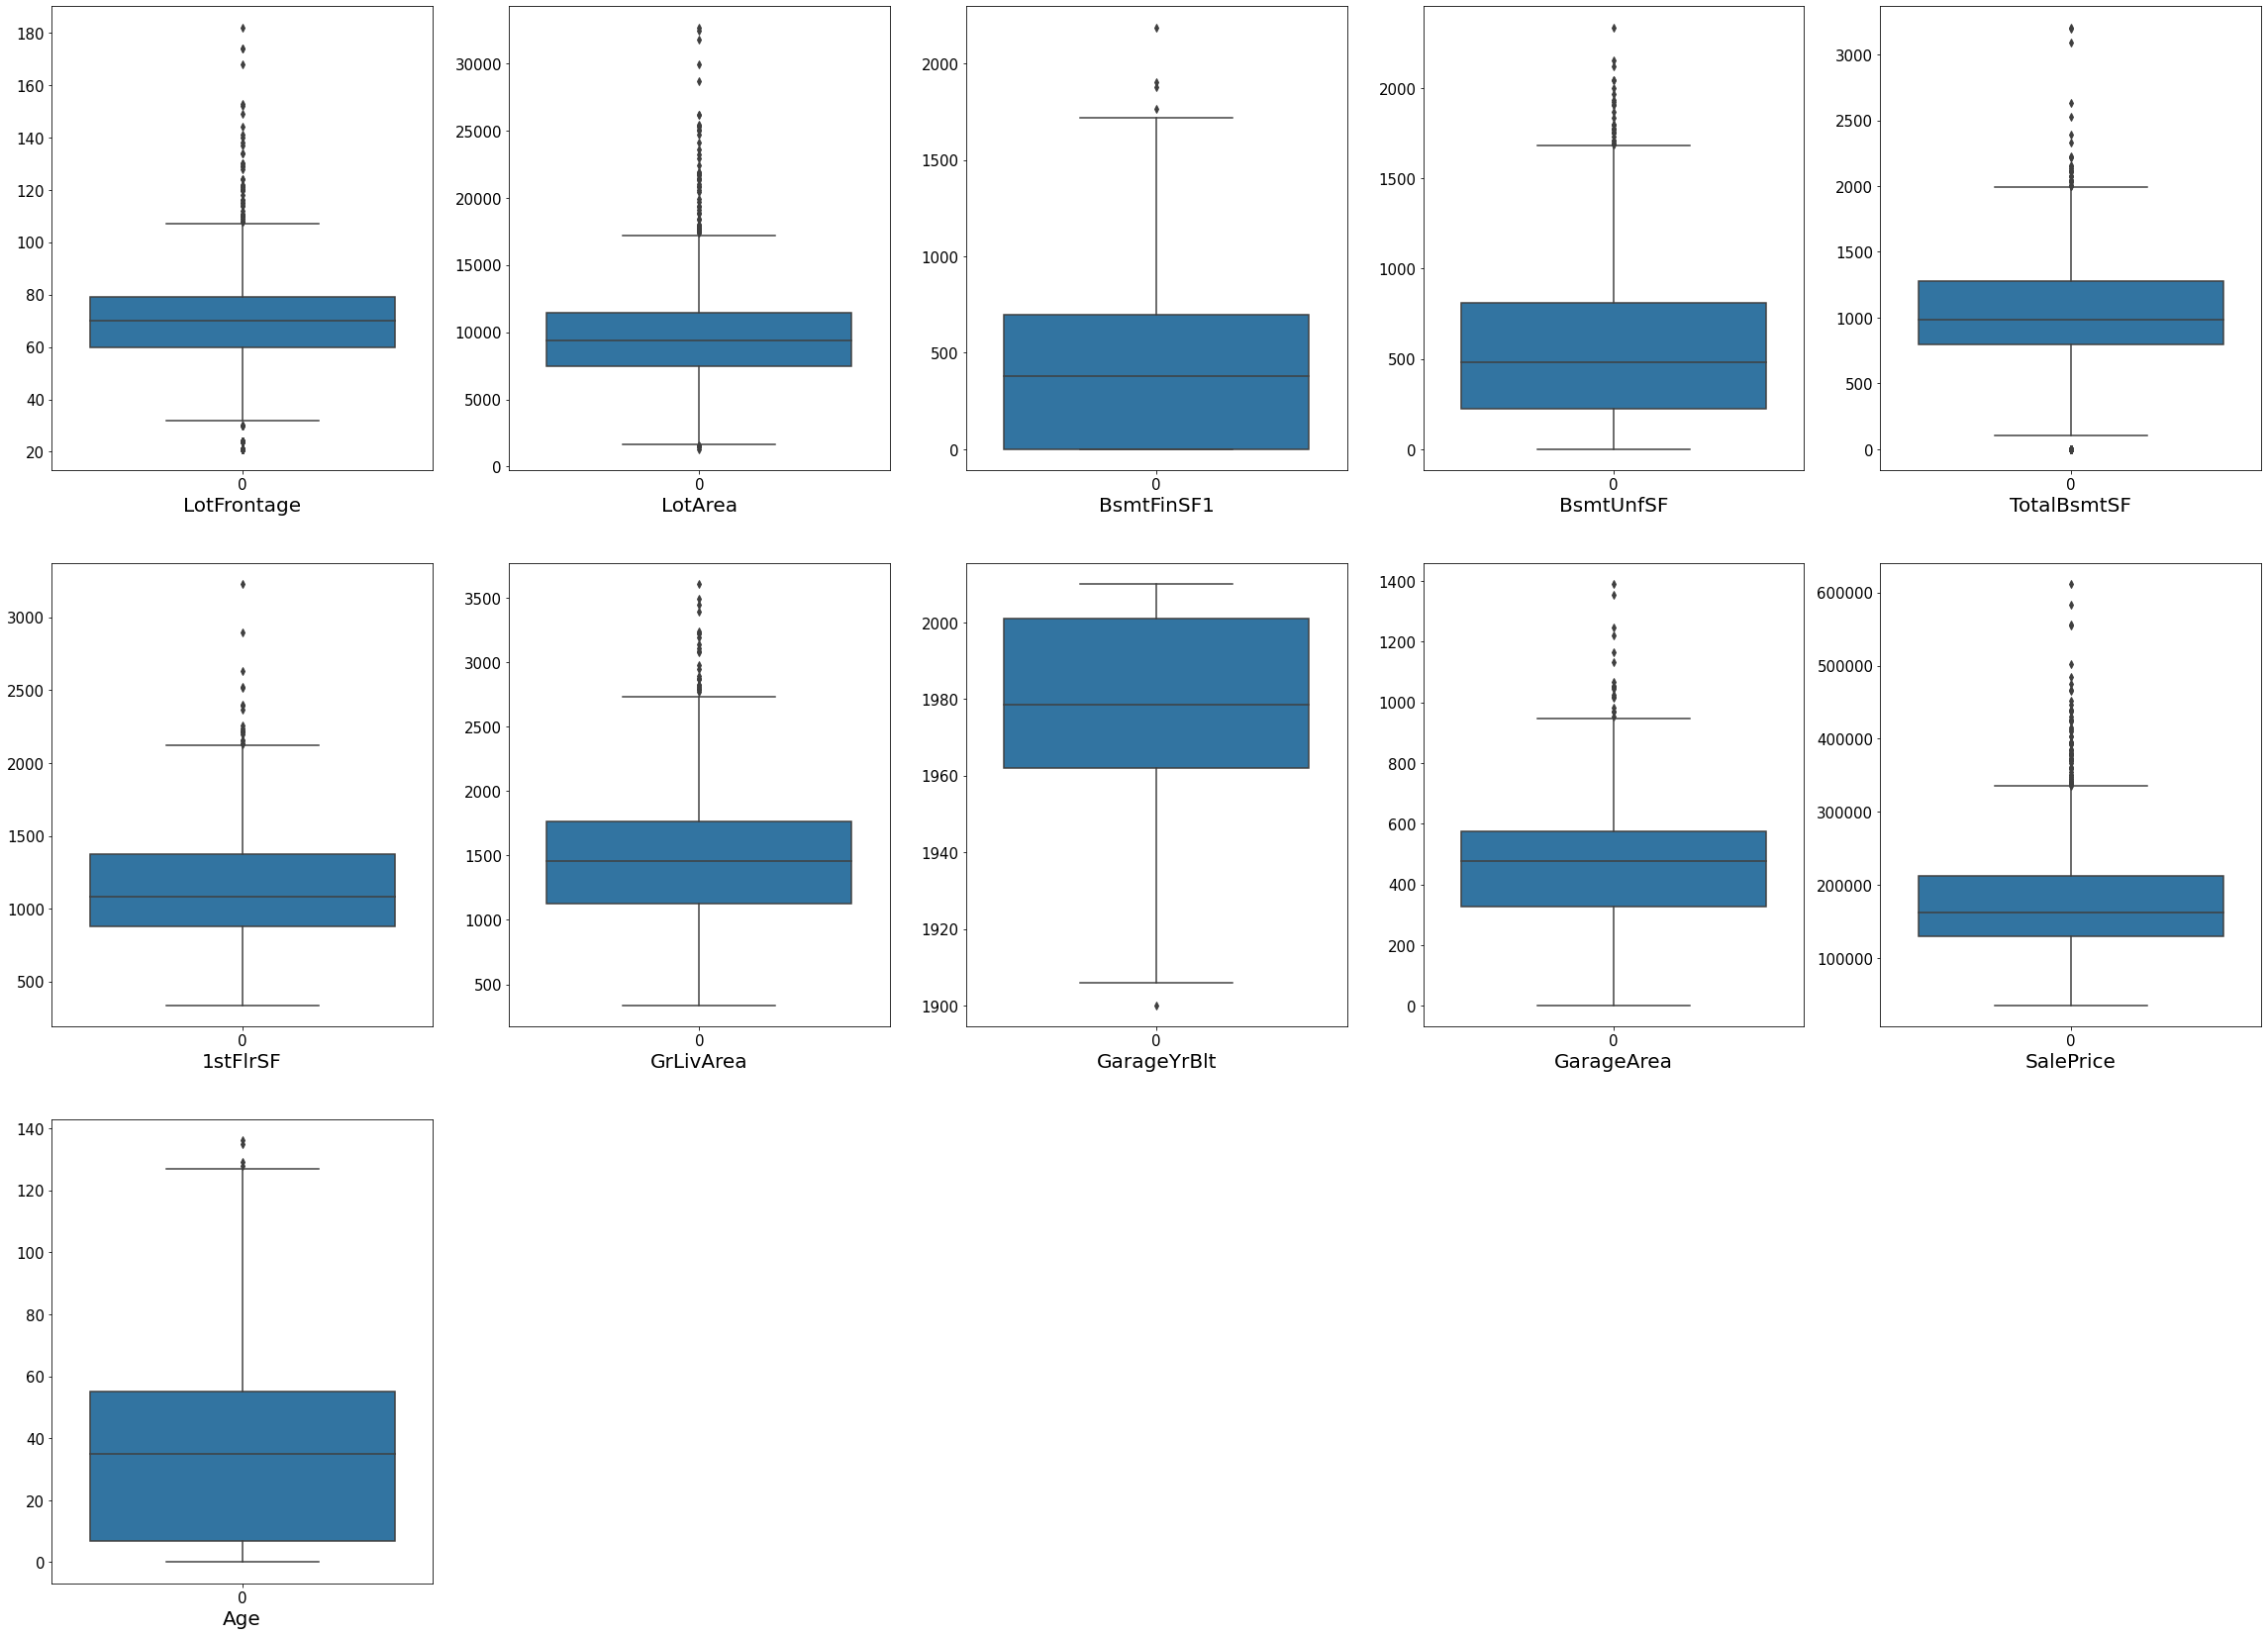

In [888]:
# box plot again to visual the data for checking
plt.figure(figsize=(40,50))
for i in range(len(numerical_col)):
    plt.subplot(5,5,i+1)
    sns.boxplot(data = df[numerical_col[i]])
    plt.xlabel(numerical_col[i],fontdict={'fontsize':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.show()

### Look the Correlation between the variables

In [889]:
# Checking the correlation between numerical variables
corr = df_numeric.corr()
corr

,LotFrontage,LotArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,GarageArea,SalePrice,Age
LotFrontage,1.00,0.43,0.23,0.13,0.39,0.46,0.40,0.07,0.34,0.35,-0.12
LotArea,0.43,1.00,0.21,-0.00,0.26,0.30,0.26,-0.02,0.18,0.26,-0.01
BsmtFinSF1,0.23,0.21,1.00,-0.50,0.52,0.45,0.21,0.15,0.30,0.39,-0.25
BsmtUnfSF,0.13,-0.00,-0.50,1.00,0.42,0.32,0.24,0.19,0.18,0.21,-0.15
TotalBsmtSF,0.39,0.26,0.52,0.42,1.00,0.82,0.45,0.32,0.49,0.61,-0.39
1stFlrSF,0.46,0.30,0.45,0.32,0.82,1.00,0.57,0.23,0.49,0.61,-0.28
GrLivArea,0.40,0.26,0.21,0.24,0.45,0.57,1.00,0.23,0.47,0.71,-0.20
GarageYrBlt,0.07,-0.02,0.15,0.19,0.32,0.23,0.23,1.00,0.56,0.49,-0.82
GarageArea,0.34,0.18,0.30,0.18,0.49,0.49,0.47,0.56,1.00,0.62,-0.48
SalePrice,0.35,0.26,0.39,0.21,0.61,0.61,0.71,0.49,0.62,1.00,-0.52


#### See above correlation TotalBsmtSF, 1stFltSF, GrLivArea,GarageYrBlt, GarageArea are positive correlate 
#### and Age is negative correlate with predicted value SalePrice

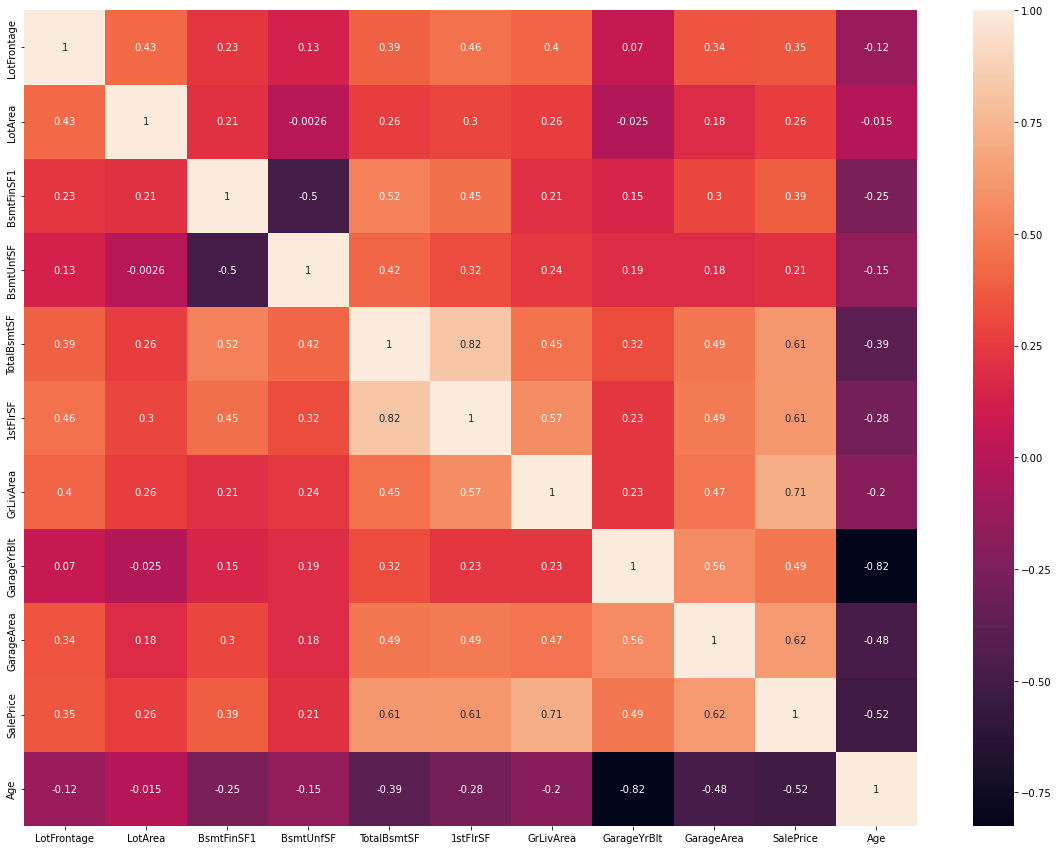

In [890]:
# Plotting the Heatmap to visually check
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)
plt.show()

#### Explore the categorical variables

In [891]:
# Categorical variables in the dataset, earlier define in the above steps
df_catagories.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition', 'rebuilt'],
      dtype='object')

In [892]:
#Loop the catagorical data count and percentage
for item in df_catagories.columns:
    print(item)
    print(df[item].value_counts(normalize=True)*100)


MSSubClass
20    36.58
60    20.24
50     9.87
120    6.05
30     4.80
160    4.38
70     4.17
80     4.03
90     3.62
190    1.95
85     1.39
75     1.11
45     0.83
180    0.70
40     0.28
Name: MSSubClass, dtype: float64
MSZoning
RL        78.51
RM        15.16
FV         4.52
RH         1.11
C (all)    0.70
Name: MSZoning, dtype: float64
Street
Pave   99.72
Grvl    0.28
Name: Street, dtype: float64
LotShape
Reg   64.19
IR1   32.89
IR2    2.36
IR3    0.56
Name: LotShape, dtype: float64
LandContour
Lvl   90.82
Bnk    4.03
HLS    3.27
Low    1.88
Name: LandContour, dtype: float64
Utilities
AllPub   99.93
NoSeWa    0.07
Name: Utilities, dtype: float64
LotConfig
Inside    72.46
Corner    17.94
CulDSac    6.05
FR2        3.27
FR3        0.28
Name: LotConfig, dtype: float64
LandSlope
Gtl   95.48
Mod    4.03
Sev    0.49
Name: LandSlope, dtype: float64
Neighborhood
NAmes     15.58
CollgCr   10.43
OldTown    7.86
Edwards    6.82
Somerst    5.98
Gilbert    5.42
NridgHt    5.35
Sawyer     5.15

__Few Observation:__ 

Many catagorical feature is not evenually distributed. like sigle catagory is present more than 80% of overall data. which means no classification is influence on the predicted variable so we can drop those columns from our data analysis.

List are the columns is repeating more than 80% of overall data
- SaleCondition, SaleType, PavedDrive, GarageCond, GarageQual, Functional, KitchenAbvGr, Electrical, CentralAir, Heating,BsmtFinType2,BsmtCond,ExterCond,RoofMatl,BldgType,Condition2,Condition1,LandSlope,LandContour,Street,Utilities


In [893]:
df.shape

(1438, 58)

In [894]:
# Drop catagory which is maximum repeating more than 80 %.
df = df.drop(['SaleCondition', 'SaleType', 'PavedDrive', 'GarageCond', 'GarageQual', 
              'Functional', 'KitchenAbvGr', 'Electrical', 'CentralAir', 'Heating','BsmtFinType2','BsmtCond',
              'ExterCond','RoofMatl','BldgType','Condition2','Condition1','LandSlope','LandContour','Street','Utilities'], axis=1)
df.shape

(1438, 37)

In [895]:
#Drop catagory which is failing in linear regresssion model .. 
#GarageCars is more correlation with GarageArea
#GarageFinish is not influence much on buyer & sales so these feature can be drop
df = df.drop(['GarageCars','GarageFinish'], axis=1)
df.shape

(1438, 35)

In [896]:
# redefine to the exisiting data set 
df_catagories=df.select_dtypes(include=['object'])
print(list(df_catagories.columns))

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'FullBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'GarageType', 'rebuilt']


In [897]:
#Loop the catagorical data count and percentage
for item in df_catagories.columns:
    print(item)
    print(df[item].value_counts(normalize=True)*100)

MSSubClass
20    36.58
60    20.24
50     9.87
120    6.05
30     4.80
160    4.38
70     4.17
80     4.03
90     3.62
190    1.95
85     1.39
75     1.11
45     0.83
180    0.70
40     0.28
Name: MSSubClass, dtype: float64
MSZoning
RL        78.51
RM        15.16
FV         4.52
RH         1.11
C (all)    0.70
Name: MSZoning, dtype: float64
LotShape
Reg   64.19
IR1   32.89
IR2    2.36
IR3    0.56
Name: LotShape, dtype: float64
LotConfig
Inside    72.46
Corner    17.94
CulDSac    6.05
FR2        3.27
FR3        0.28
Name: LotConfig, dtype: float64
Neighborhood
NAmes     15.58
CollgCr   10.43
OldTown    7.86
Edwards    6.82
Somerst    5.98
Gilbert    5.42
NridgHt    5.35
Sawyer     5.15
NWAmes     5.08
SawyerW    4.10
BrkSide    4.03
Crawfor    3.55
Mitchel    3.41
IDOTRR     2.57
NoRidge    2.57
Timber     2.36
SWISU      1.74
StoneBr    1.67
ClearCr    1.39
MeadowV    1.18
Blmngtn    1.18
BrDale     1.11
Veenker    0.70
NPkVill    0.63
Blueste    0.14
Name: Neighborhood, dtype: float6

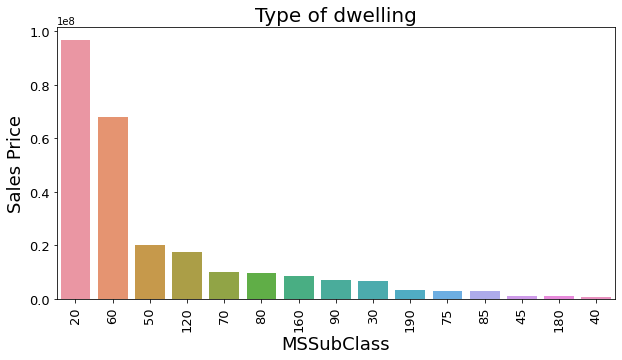

In [898]:
#plot sns barplot to see the distribution of catagorical value of MSSubClass
colName = 'MSSubClass'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('MSSubClass',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('Type of dwelling',fontsize=20)
plt.show()

### Seeing value, its clear only 2 values 20 & 60 are highest and remaining are insignicant but need to keep for building model
### so will impute by range by reducing the type

In [899]:
# define function for range, reducing the values
def subclassrange(values):
    val = str(values)
    if (val != '20' and val != '60'):
        return 'Apart20&60'
    else:
        return val

In [900]:
#impute the value by range. 
df['MSSubClass'] = df['MSSubClass'].apply(subclassrange)
df['MSSubClass'].head

<bound method NDFrame.head of 0               60
1               20
2               60
3       Apart20&60
4               60
           ...    
1455            60
1456            20
1457    Apart20&60
1458            20
1459            20
Name: MSSubClass, Length: 1438, dtype: object>

In [901]:
# Checking MSZoning columns
frq = df.MSZoning.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<5).dropna()
frq
df.MSZoning = df.MSZoning.replace(frq.index,'Others')  
df.MSZoning.value_counts()/df.shape[0]*100

RL       78.51
RM       15.16
Others    6.33
Name: MSZoning, dtype: float64

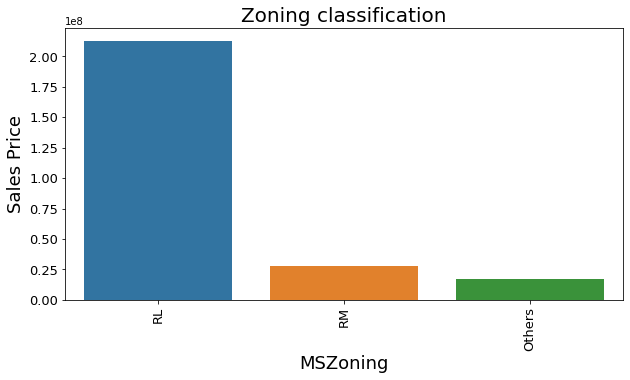

In [902]:
colName = 'MSZoning'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('MSZoning',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('Zoning classification',fontsize=20)
plt.show()

In [903]:
# Checking LotShape columns
frq = df.LotShape.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<5).dropna()
frq
df.LotShape = df.LotShape.replace(frq.index,'Others')  
df.LotShape.value_counts()/df.shape[0]*100

Reg      64.19
IR1      32.89
Others    2.92
Name: LotShape, dtype: float64

In [904]:
# Checking LotConfig columns
frq = df.LotConfig.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<10).dropna()
frq
df.LotConfig = df.LotConfig.replace(frq.index,'Others')  
df.LotConfig.value_counts()/df.shape[0]*100

Inside   72.46
Corner   17.94
Others    9.60
Name: LotConfig, dtype: float64

In [905]:
# Checking HouseStyle columns
frq = df.HouseStyle.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<1).dropna()
frq
df.HouseStyle = df.HouseStyle.replace(frq.index,'Others')  
df.HouseStyle.value_counts()/df.shape[0]*100

1Story   49.72
2Story   30.39
1.5Fin   10.50
SLvl      4.52
SFoyer    2.57
Others    2.29
Name: HouseStyle, dtype: float64

In [906]:
# Checking OverallCond columns
frq = df.OverallCond.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<2).dropna()
frq
df.OverallCond = df.OverallCond.replace(frq.index,'Others')  
df.OverallCond.value_counts()/df.shape[0]*100

5        56.19
6        17.32
7        13.98
8         4.94
4         3.89
Others    3.69
Name: OverallCond, dtype: float64

In [907]:
# Checking RoofStyle columns
frq = df.RoofStyle.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<1).dropna()
frq
df.RoofStyle = df.RoofStyle.replace(frq.index,'Others')  
df.RoofStyle.value_counts()/df.shape[0]*100

Gable    78.65
Hip      19.26
Others    2.09
Name: RoofStyle, dtype: float64

In [908]:
# Checking Exterior1st columns
frq = df.Exterior1st.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<0.15).dropna()
frq
df.Exterior1st = df.Exterior1st.replace(frq.index,'Others')  
df.Exterior1st.value_counts()/df.shape[0]*100

VinylSd   35.74
MetalSd   15.23
HdBoard   15.23
Wd Sdng   13.84
Plywood    7.16
CemntBd    4.10
BrkFace    3.41
WdShing    1.74
Stucco     1.67
AsbShng    1.39
Others     0.49
Name: Exterior1st, dtype: float64

In [909]:
# Checking MasVnrType columns
frq = df.MasVnrType.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<10).dropna()
frq
df.MasVnrType = df.MasVnrType.replace(frq.index,'Others')  
df.MasVnrType.value_counts()/df.shape[0]*100

None      59.81
BrkFace   30.60
Others     9.60
Name: MasVnrType, dtype: float64

In [910]:
# Checking ExterQual columns ExterCond
frq = df.ExterQual.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<5).dropna()
frq
df.ExterQual = df.ExterQual.replace(frq.index,'Others')  
df.ExterQual.value_counts()/df.shape[0]*100

TA       62.17
Gd       33.52
Others    4.31
Name: ExterQual, dtype: float64

In [911]:
# Checking Foundation columns 
frq = df.Foundation.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<2).dropna()
frq
df.Foundation = df.Foundation.replace(frq.index,'Others')  
df.Foundation.value_counts()/df.shape[0]*100

PConc    44.44
CBlock   43.18
BrkTil   10.08
Others    2.29
Name: Foundation, dtype: float64

In [912]:
# Checking TotRmsAbvGrd columns 
frq = df.TotRmsAbvGrd.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<4).dropna()
frq
df.TotRmsAbvGrd = df.TotRmsAbvGrd.replace(frq.index,'Others')  
df.TotRmsAbvGrd.value_counts()/df.shape[0]*100

6        27.89
7        22.60
5        18.71
8        12.87
4         6.75
Others    6.12
9         5.08
Name: TotRmsAbvGrd, dtype: float64

In [913]:
# Checking Exterior2nd columns 
frq = df.Exterior2nd.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<4).dropna()
frq
df.Exterior2nd = df.Exterior2nd.replace(frq.index,'Others')  
df.Exterior2nd.value_counts()/df.shape[0]*100

VinylSd   34.98
MetalSd   14.81
HdBoard   14.12
Wd Sdng   13.35
Plywood    9.53
Others     9.11
CmentBd    4.10
Name: Exterior2nd, dtype: float64

In [914]:
# Checking Neighborhood columns 
frq = df.Neighborhood.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<3).dropna()
frq
df.Neighborhood = df.Neighborhood.replace(frq.index,'Others')  
df.Neighborhood.value_counts()/df.shape[0]*100

Others    17.25
NAmes     15.58
CollgCr   10.43
OldTown    7.86
Edwards    6.82
Somerst    5.98
Gilbert    5.42
NridgHt    5.35
Sawyer     5.15
NWAmes     5.08
SawyerW    4.10
BrkSide    4.03
Crawfor    3.55
Mitchel    3.41
Name: Neighborhood, dtype: float64

In [915]:
# Checking BsmtFinType1 columns 
frq = df.BsmtFinType1.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<6).dropna()
frq
df.BsmtFinType1 = df.BsmtFinType1.replace(frq.index,'Others')  
df.BsmtFinType1.value_counts()/df.shape[0]*100

Unf      29.83
GLQ      28.37
ALQ      15.02
BLQ      10.15
Rec       8.97
Others    7.65
Name: BsmtFinType1, dtype: float64

In [916]:
# Checking BsmtQual columns 
frq = df.BsmtQual.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<4).dropna()
frq
df.BsmtQual = df.BsmtQual.replace(frq.index,'Others')  
df.BsmtQual.value_counts()/df.shape[0]*100

TA       44.71
Gd       42.28
Ex        8.00
Others    5.01
Name: BsmtQual, dtype: float64

In [917]:
# Checking HeatingQC columns 
frq = df.HeatingQC.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<4).dropna()
frq
df.HeatingQC = df.HeatingQC.replace(frq.index,'Others')  
df.HeatingQC.value_counts()/df.shape[0]*100

Ex       50.70
TA       29.35
Gd       16.55
Others    3.41
Name: HeatingQC, dtype: float64

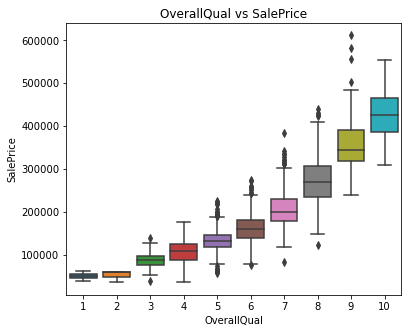

In [918]:
# Plotting the boxplot for OverallQual vs SalePrice
plt.figure(figsize=(6,5))
sns.boxplot(x="OverallQual", y="SalePrice", data=df)
plt.title("OverallQual vs SalePrice")
plt.show()

Observation: As OverallQual increases, the SalePrice also increases.

In [919]:
#replace OverallQual rating by 2 values i.e <5 or >5
#df['OverallQual'] = df['OverallQual'].apply(lambda x: '<5' if float(x) < 5 else '>5')

In [920]:
# Plotting the boxplot for OverallQual vs SalePrice
#plt.figure(figsize=(6,5))
#sns.boxplot(x="OverallQual", y="SalePrice", data=df)
#plt.title("OverallQual vs SalePrice")
#plt.show()

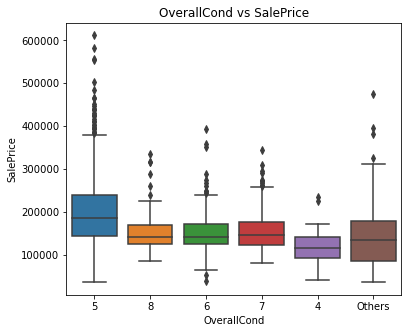

In [921]:
# Plotting the boxplot for OverallCond vs SalePrice
plt.figure(figsize=(6,5))
sns.boxplot(x="OverallCond", y="SalePrice", data=df)
plt.title("OverallCond vs SalePrice")
plt.show()

In [922]:
#replace OverallCond rating by 2 values i.e <5 or >5
#df['OverallCond'] = df['OverallCond'].apply(lambda x: '<5' if float(x) < 5 else '>5')

In [923]:
#Loop the catagorical data count and percentage
for item in df_catagories.columns:
    print(item)
    print(df[item].value_counts(normalize=True)*100)

MSSubClass
Apart20&60   43.18
20           36.58
60           20.24
Name: MSSubClass, dtype: float64
MSZoning
RL       78.51
RM       15.16
Others    6.33
Name: MSZoning, dtype: float64
LotShape
Reg      64.19
IR1      32.89
Others    2.92
Name: LotShape, dtype: float64
LotConfig
Inside   72.46
Corner   17.94
Others    9.60
Name: LotConfig, dtype: float64
Neighborhood
Others    17.25
NAmes     15.58
CollgCr   10.43
OldTown    7.86
Edwards    6.82
Somerst    5.98
Gilbert    5.42
NridgHt    5.35
Sawyer     5.15
NWAmes     5.08
SawyerW    4.10
BrkSide    4.03
Crawfor    3.55
Mitchel    3.41
Name: Neighborhood, dtype: float64
HouseStyle
1Story   49.72
2Story   30.39
1.5Fin   10.50
SLvl      4.52
SFoyer    2.57
Others    2.29
Name: HouseStyle, dtype: float64
OverallQual
5    27.26
6    25.80
7    21.84
8    11.54
4     8.00
9     2.92
3     1.39
10    0.90
2     0.21
1     0.14
Name: OverallQual, dtype: float64
OverallCond
5        56.19
6        17.32
7        13.98
8         4.94
4       

### Checking the target variable i.e. SalePrice using distplot

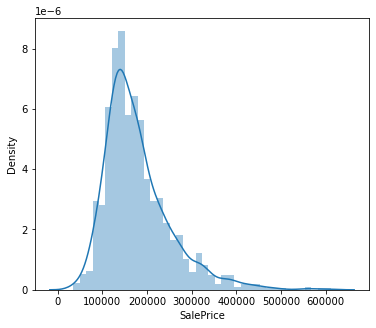

In [924]:
plt.figure(figsize=(6,5))
sns.distplot(df.SalePrice)
plt.show()

* Data is not perfrectly normal
* We need to do log transformation

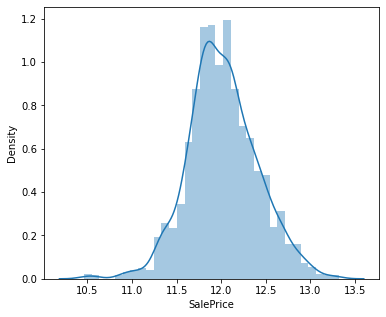

In [925]:
# apply log transformation from nummpy
plt.figure(figsize=(6,5))
sns.distplot(np.log(df.SalePrice))
plt.show()

## Creating the dummy variables

In [926]:
# Redefine all categorical variables after cleanup

df_catagories=df.select_dtypes(include=['object'])
df_catagories.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,rebuilt
0,60,RL,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,2,3,Gd,8,Attchd,No
1,20,RL,Reg,Others,Others,1Story,6,8,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,2,3,TA,6,Attchd,No
2,60,RL,IR1,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,2,3,Gd,6,Attchd,Yes
3,Apart20&60,RL,IR1,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Others,None,TA,BrkTil,TA,No,ALQ,Gd,1,3,Gd,7,Detchd,Yes
4,60,RL,IR1,Others,Others,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,2,4,Gd,9,Attchd,No


In [927]:
# convert into dummies
df_dummies = pd.get_dummies(df_catagories, drop_first=True)
df_dummies.head()

,MSSubClass_60,MSSubClass_Apart20&60,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LotConfig_Inside,LotConfig_Others,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Others,RoofStyle_Hip,...,BsmtQual_Gd,BsmtQual_Others,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_Others,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,FullBath_1,FullBath_2,FullBath_3,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_Others,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,rebuilt_Yes
0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [928]:
# Drop categorical variables 
df=df.drop(list(df_catagories.columns), axis=1)

In [929]:
# concat dummy variables with df
df = pd.concat([df, df_dummies], axis=1)
df.shape

(1438, 117)

In [930]:
df.head()

,LotFrontage,LotArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,GarageArea,SalePrice,Age,MSSubClass_60,MSSubClass_Apart20&60,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LotConfig_Inside,LotConfig_Others,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,...,BsmtQual_Gd,BsmtQual_Others,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_Others,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,FullBath_1,FullBath_2,FullBath_3,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_Others,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,rebuilt_Yes
0,65.00,8450,706,150,856,856,1710,"2,003.00",548,208500,5,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,80.00,9600,978,284,1262,1262,1262,"1,976.00",460,181500,31,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,68.00,11250,486,434,920,920,1786,"2,001.00",608,223500,7,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,60.00,9550,216,540,756,961,1717,"1,998.00",642,140000,91,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4,84.00,14260,655,490,1145,1145,2198,"2,000.00",836,250000,8,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0


## Splitting the data into Train and Test data set 70% &  30%

In [931]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,train_size=0.7,
                                                    test_size = 0.3, random_state=100)


In [932]:
df_test.shape

(432, 117)

## Scalling the data sets

In [933]:
# scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[numerical_col] = scaler.fit_transform(df_train[numerical_col])
df_test[numerical_col] = scaler.transform(df_test[numerical_col])
X_train = df_train.drop('SalePrice',axis=1)
y_train = df_train.SalePrice
X_test = df_test.drop('SalePrice',axis=1)
y_test = df_test.SalePrice

In [934]:
numerical_col

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice',
       'Age'],
      dtype='object')

In [935]:
X_train.head()

,LotFrontage,LotArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,GarageArea,Age,MSSubClass_60,MSSubClass_Apart20&60,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LotConfig_Inside,LotConfig_Others,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,...,BsmtQual_Gd,BsmtQual_Others,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_Others,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,FullBath_1,FullBath_2,FullBath_3,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_Others,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,rebuilt_Yes
1446,0.03,4.14,0.36,0.09,0.37,0.13,-0.62,-0.67,-0.75,0.40,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
390,-0.95,-0.31,-0.46,-0.76,-0.43,-0.50,-0.24,-0.01,-0.41,2.41,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
1011,0.27,0.04,-1.02,-1.29,-2.52,1.45,0.38,0.01,-2.24,0.30,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1130,-0.22,-0.46,0.43,-0.13,0.21,0.52,1.05,0.11,0.51,1.51,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1158,1.10,0.57,-1.02,2.39,1.32,1.22,0.21,1.23,1.73,-1.18,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1


 ## Model Building and Evaluation

## Linear Regression

In [936]:
# Building the regression model
lreg = LinearRegression()
# Fit a line
lreg.fit(X_train, y_train)

LinearRegression()

In [937]:
# Print the coefficients and intercept
print(lreg.intercept_)
print(lreg.coef_)

-0.7562245236039165
[ 6.51708217e-03  4.17536957e-02  1.17544963e-01 -3.02368373e-02
  1.22481512e-01 -1.47199202e-02  3.67886057e-01  1.76921362e-02
  7.61878993e-02 -1.27889571e-01  5.41279206e-02 -1.14220950e-01
  5.65221122e-02 -3.96321512e-02  2.17222309e-02 -1.55077515e-02
 -3.44180029e-03  1.39857440e-02 -2.54356078e-01  2.66262723e-01
 -2.78498452e-01 -2.15740310e-01 -3.71706509e-01 -3.20582830e-01
 -3.08787467e-01 -3.46092589e-02 -1.47465489e-01 -1.35618138e-01
 -2.80674345e-01 -2.79444557e-01 -3.38427615e-02  3.07784507e-02
 -4.87560312e-02  6.09362104e-03  7.85585785e-02  1.80832094e-01
  2.41673384e-01  4.44491839e-01  6.30010338e-01  6.37090782e-01
  7.21189250e-01  8.46162201e-01  1.15053261e+00  1.44162574e+00
  1.88437143e+00  1.27982883e-01  2.29509520e-01  3.49156940e-01
  3.07987363e-01  1.80558010e-01  7.52183356e-03 -1.81491915e-02
  2.33517261e-01 -5.99112197e-02  6.06022306e-02  1.42781904e-01
 -3.84159754e-01  7.06299406e-02  1.88736936e-01  6.72653039e-02
 -6.0

In [938]:
#find the coef of feature for fine tunnning 
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Linear'] = lreg.coef_
betas

,Linear
LotFrontage,0.01
LotArea,0.04
BsmtFinSF1,0.12
BsmtUnfSF,-0.03
TotalBsmtSF,0.12
...,...
GarageType_BuiltIn,0.45
GarageType_CarPort,0.15
GarageType_Detchd,0.38
GarageType_No Garage,0.37


#### Metrics to assess model performance, Lets calculate some metrics such as R2 score, RSS, MSE and RMSE

In [939]:
y_pred_train = lreg.predict(X_train)
y_pred_test = lreg.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score_train: ' + str(r2_train_lr))
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_score_test: ' + str(r2_test_lr))
metric.append(r2_test_lr)

# sum of the squared difference between the actual and the predicted values
rss_train_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_Train : ' + str(rss_train_lr))
metric.append(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_test : ' + str(rss_test_lr))
metric.append(rss_test_lr)

# MSE is RSS divided by the number of observation
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE_train : ' + str(mse_train_lr))
metric.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE_test : '+ str(mse_test_lr))  
metric.append(mse_test_lr)

# RMSE is square root of MSE
print('RMSE_train : '+ str(mse_train_lr**0.5))  
metric.append(mse_train_lr**0.5)

print('RMSE_test : '+ str(mse_test_lr**0.5))  
metric.append(mse_test_lr**0.5)


r2_score_train: 0.9160123396526509
r2_score_test: 0.9063155573917777
RSS_Train : 84.49158630943312
RSS_test : 42.81164295317435
MSE_train : 0.08398766034734902
MSE_test : 0.09910102535457026
RMSE_train : 0.2898062462186573
RMSE_test : 0.3148031533427997


#### Checking assumption

In [940]:
# Residual analysis
y_train_res = y_train - y_pred_train # Residuals

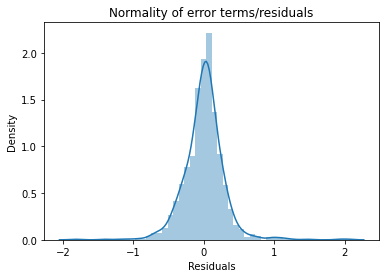

In [941]:
# Distribution of errors
p = sns.distplot(y_train_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

##### Errors are normally distributed

## Ridge Regression

In [942]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [943]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_['alpha'])

2.0


In [944]:
#Fitting Ridge model for alpha = 6 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.00923821  0.04141418  0.12622609 -0.02846665  0.11182652  0.01294504
  0.35498241  0.01804041  0.07588814 -0.12990394  0.05347597 -0.10159004
  0.10047603  0.02113703  0.02092633 -0.02217718 -0.00343027  0.0130289
 -0.13988165  0.32862526 -0.16926043 -0.10117644 -0.26384581 -0.21149307
 -0.17877512  0.10118634 -0.07767133 -0.03985006 -0.16844359 -0.16662386
  0.10910986 -0.00734937 -0.04079476  0.01034973  0.0277096   0.1280883
 -0.1637714  -0.33632932 -0.23018208 -0.2396571  -0.16539775 -0.05183791
  0.22629222  0.45828986  0.75869604  0.08442459  0.18046533  0.29305532
  0.25395875  0.09710746  0.01398981 -0.00473811  0.22123758 -0.02020945
  0.03898249  0.07967109 -0.28450446  0.04551549  0.16410005  0.04467666
 -0.0600681   0.05998854 -0.02328177 -0.04464761 -0.03835817 -0.04281888
  0.02803002  0.10705436 -0.02176734  0.02197001  0.15170467 -0.05700119
 -0.04937758 -0.05475344  0.01323348 -0.20514378 -0.1831536  -0.16206282
  0.18835806  0.05579161 -0.02472932  0.13110242  0.0

#### Metrics to assess model performance, Lets calculate some metrics such as R2 score, RSS, MSE and RMSE

In [945]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score_train: ' + str(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_score_test: ' + str(r2_test_lr))
metric2.append(r2_test_lr)

# sum of the squared difference between the actual and the predicted values
rss_train_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_Train : ' + str(rss_train_lr))
metric2.append(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_test : ' + str(rss_test_lr))
metric2.append(rss_test_lr)

# MSE is RSS divided by the number of observation
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE_train : ' + str(mse_train_lr))
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE_test : '+ str(mse_test_lr))  
metric2.append(mse_test_lr)

# RMSE is square root of MSE
print('RMSE_train : '+ str(mse_train_lr**0.5))  
metric2.append(mse_train_lr**0.5)

print('RMSE_test : '+ str(mse_test_lr**0.5))  
metric2.append(mse_test_lr**0.5)


r2_score_train: 0.9138280358171874
r2_score_test: 0.9051833006831934
RSS_Train : 86.68899596790943
RSS_test : 43.32905831681117
MSE_train : 0.08617196418281256
MSE_test : 0.10029874610372956
RMSE_train : 0.293550616049111
RMSE_test : 0.31669977281919476


In [946]:
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=2]
ridge_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.01,0.00,0.00,0.00,0.00,{'alpha': 0.0001},-0.23,-0.23,-0.26,-0.23,-0.24,-0.24,0.01,21,-0.20,-0.20,-0.19,-0.20,-0.20,-0.20,0.00
1,0.00,0.00,0.00,0.01,0.00,{'alpha': 0.001},-0.23,-0.23,-0.26,-0.23,-0.24,-0.24,0.01,20,-0.20,-0.20,-0.19,-0.20,-0.20,-0.20,0.00
2,0.00,0.01,0.00,0.00,0.01,{'alpha': 0.01},-0.23,-0.23,-0.26,-0.23,-0.24,-0.24,0.01,19,-0.20,-0.20,-0.19,-0.20,-0.20,-0.20,0.00
3,0.01,0.01,0.00,0.00,0.05,{'alpha': 0.05},-0.23,-0.23,-0.26,-0.23,-0.24,-0.24,0.01,17,-0.20,-0.20,-0.19,-0.20,-0.20,-0.20,0.00
4,0.03,0.04,0.00,0.00,0.10,{'alpha': 0.1},-0.23,-0.23,-0.26,-0.23,-0.24,-0.24,0.01,16,-0.20,-0.20,-0.19,-0.20,-0.20,-0.20,0.00
5,0.00,0.00,0.00,0.01,0.20,{'alpha': 0.2},-0.23,-0.23,-0.26,-0.23,-0.24,-0.24,0.01,14,-0.20,-0.20,-0.19,-0.20,-0.20,-0.20,0.00
6,0.01,0.01,0.00,0.00,0.30,{'alpha': 0.3},-0.23,-0.23,-0.26,-0.23,-0.24,-0.24,0.01,12,-0.20,-0.20,-0.19,-0.20,-0.20,-0.20,0.00
7,0.00,0.01,0.00,0.01,0.40,{'alpha': 0.4},-0.22,-0.23,-0.26,-0.23,-0.24,-0.24,0.01,11,-0.20,-0.20,-0.19,-0.20,-0.20,-0.20,0.00
8,0.00,0.00,0.00,0.00,0.50,{'alpha': 0.5},-0.22,-0.23,-0.26,-0.23,-0.24,-0.24,0.01,9,-0.20,-0.20,-0.19,-0.20,-0.20,-0.20,0.00
9,0.00,0.01,0.00,0.01,0.60,{'alpha': 0.6},-0.22,-0.23,-0.26,-0.23,-0.24,-0.23,0.01,8,-0.20,-0.20,-0.19,-0.20,-0.20,-0.20,0.00


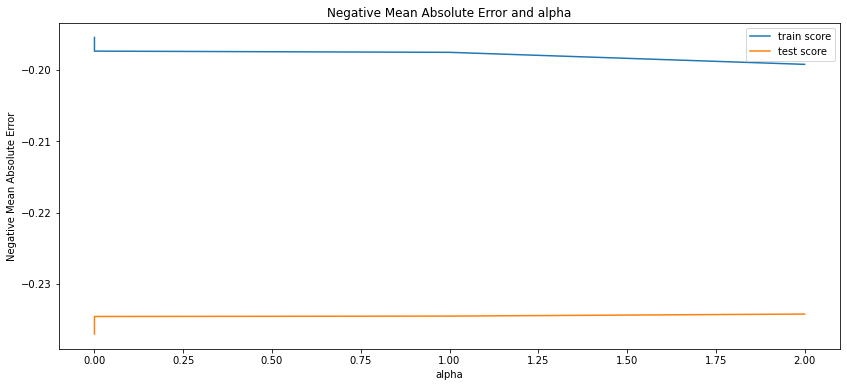

In [947]:
# plotting mean test and train scores with alpha 
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')
plt.figure(figsize=(14,6))

# plotting
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

## Result:
- Best hyperparameter alpha is 2 and has a min. gap between the test and the training score.
- From the above result, train data has around 0.91 R2 value and test data have 0.90 R2 value is predicting well.
- Model is not overfittedby comparable values of R2 scores

## Lasso Regression

In [948]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [949]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_['alpha'])

0.001


In [950]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [951]:
lasso.coef_

array([ 0.00760889,  0.04128328,  0.14217828, -0.00648919,  0.09942976,
        0.        ,  0.35509692,  0.01740601,  0.07726409, -0.13317017,
        0.02498196, -0.09762766,  0.07648637, -0.        ,  0.        ,
       -0.02539667, -0.        ,  0.01032254, -0.04931975,  0.38055385,
       -0.0753266 , -0.        , -0.16552149, -0.12299036, -0.05359513,
        0.16176179, -0.00652215,  0.01479414, -0.07207565, -0.06776377,
        0.14397223, -0.        , -0.0162957 ,  0.        ,  0.        ,
        0.08994177, -0.        , -0.16426761, -0.08528791, -0.07636797,
       -0.        ,  0.12368649,  0.43646057,  0.75965001,  1.16080628,
        0.00243727,  0.10233247,  0.20497665,  0.17642278,  0.        ,
        0.00963606, -0.        ,  0.16911382, -0.        , -0.        ,
        0.02049172, -0.19797388, -0.        ,  0.03418975,  0.01943549,
       -0.01930152,  0.        , -0.        ,  0.        , -0.00651426,
       -0.01069449,  0.04286449,  0.05270216, -0.02351764,  0.01

### Metrics to assess model performance, Lets calculate some metrics such as R2 score, RSS, MSE and RMSE

In [952]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score_train: ' + str(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_score_test: ' + str(r2_test_lr))
metric3.append(r2_test_lr)

# sum of the squared difference between the actual and the predicted values
rss_train_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_Train : ' + str(rss_train_lr))
metric3.append(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_test : ' + str(rss_test_lr))
metric3.append(rss_test_lr)

# MSE is RSS divided by the number of observation
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE_train : ' + str(mse_train_lr))
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE_test : '+ str(mse_test_lr))  
metric3.append(mse_test_lr)

# RMSE is square root of MSE
print('RMSE_train : '+ str(mse_train_lr**0.5))  
metric3.append(mse_train_lr**0.5)

print('RMSE_test : '+ str(mse_test_lr**0.5))  
metric3.append(mse_test_lr**0.5)

r2_score_train: 0.9105522006828524
r2_score_test: 0.9047479043396702
RSS_Train : 89.98448611305058
RSS_test : 43.52802446618542
MSE_train : 0.08944779931714769
MSE_test : 0.10075931589394774
RMSE_train : 0.2990782494885706
RMSE_test : 0.3174260794168427


In [953]:
# cv results
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results = lasso_results[lasso_results['param_alpha']<=5]
lasso_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.03,0.01,0.00,0.00,0.00,{'alpha': 0.0001},-0.22,-0.23,-0.26,-0.23,-0.24,-0.23,0.01,2,-0.20,-0.20,-0.19,-0.20,-0.20,-0.20,0.00
1,0.01,0.01,0.00,0.01,0.00,{'alpha': 0.001},-0.22,-0.22,-0.26,-0.22,-0.23,-0.23,0.02,1,-0.20,-0.20,-0.20,-0.20,-0.20,-0.20,0.00
2,0.01,0.01,0.00,0.01,0.01,{'alpha': 0.01},-0.27,-0.27,-0.29,-0.26,-0.28,-0.27,0.01,3,-0.26,-0.26,-0.25,-0.26,-0.26,-0.26,0.00
3,0.00,0.00,0.00,0.00,0.05,{'alpha': 0.05},-0.30,-0.32,-0.32,-0.32,-0.32,-0.32,0.01,4,-0.31,-0.30,-0.31,-0.31,-0.30,-0.31,0.00
4,0.00,0.00,0.00,0.01,0.10,{'alpha': 0.1},-0.31,-0.34,-0.34,-0.33,-0.33,-0.33,0.01,5,-0.33,-0.32,-0.32,-0.33,-0.32,-0.32,0.00
5,0.01,0.01,0.00,0.00,0.20,{'alpha': 0.2},-0.33,-0.38,-0.38,-0.35,-0.36,-0.36,0.02,6,-0.36,-0.36,-0.36,-0.36,-0.36,-0.36,0.00
6,0.01,0.01,0.00,0.01,0.30,{'alpha': 0.3},-0.39,-0.46,-0.46,-0.42,-0.42,-0.43,0.02,7,-0.43,-0.42,-0.43,-0.43,-0.42,-0.43,0.00
7,0.00,0.00,0.00,0.00,0.40,{'alpha': 0.4},-0.48,-0.54,-0.56,-0.50,-0.50,-0.52,0.03,8,-0.52,-0.51,-0.52,-0.51,-0.51,-0.51,0.00
8,0.00,0.00,0.01,0.01,0.50,{'alpha': 0.5},-0.57,-0.64,-0.65,-0.57,-0.58,-0.60,0.03,9,-0.60,-0.60,-0.60,-0.59,-0.59,-0.60,0.00
9,0.00,0.01,0.00,0.01,0.60,{'alpha': 0.6},-0.65,-0.71,-0.72,-0.63,-0.66,-0.68,0.04,10,-0.68,-0.67,-0.67,-0.67,-0.67,-0.67,0.00


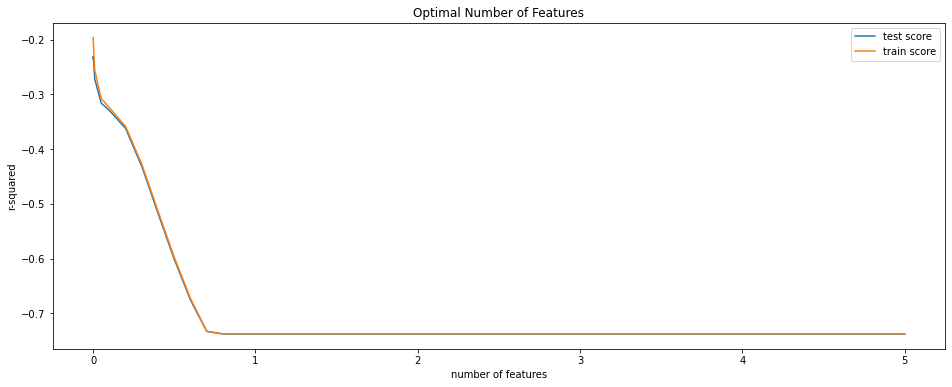

In [954]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(lasso_results["param_alpha"], lasso_results["mean_test_score"])
plt.plot(lasso_results["param_alpha"], lasso_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')
plt.show()

## Result:
- Best hyperparameter alpha is 0.001 and has closest between the test and the training score.
- From the above result, train data has around 0.91 R2 value and test data have 0.90 R2 value is predicting well like ridge.
- Model is not overfittedby comparable values of R2 scores


## Comparing all the 3 regression from combined table

In [955]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis=1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.92,0.91,0.91
1,R2 Score (Test),0.91,0.91,0.90
2,RSS (Train),84.49,86.69,89.98
3,RSS (Test),42.81,43.33,43.53
4,MSE (Train),0.08,0.09,0.09
5,MSE (Test),0.10,0.10,0.10
6,RMSE (Train),0.29,0.29,0.30
7,RMSE (Test),0.31,0.32,0.32


### Result
- By comparing techniques of Lasso and Ridge Regression, are likely same r2 value.
- From complexity prespective, Lasso is preferable in huge number features variables. here in model 116.

In [956]:
X_train.shape

(1006, 116)

## Lets observe the changes in the coefficients after regularization

In [957]:
betas = pd.DataFrame(index=X_train.columns)

In [958]:
betas.rows = X_train.columns

In [959]:
betas['Linear'] = lreg.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [960]:
betas.shape

(116, 3)

In [961]:
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
LotFrontage,0.01,0.01,0.01
LotArea,0.04,0.04,0.04
BsmtFinSF1,0.12,0.13,0.14
BsmtUnfSF,-0.03,-0.03,-0.01
TotalBsmtSF,0.12,0.11,0.10
1stFlrSF,-0.01,0.01,0.00
GrLivArea,0.37,0.35,0.36
GarageYrBlt,0.02,0.02,0.02
GarageArea,0.08,0.08,0.08
Age,-0.13,-0.13,-0.13


## Top most positive coefficent feature from RIDGE & LASSO regressoin

In [962]:
# Top 10 +ve coef feature from Ridge
betas.Ridge.sort_values(ascending=False).head(10)

OverallQual_10         0.76
OverallQual_9          0.46
GrLivArea              0.35
Neighborhood_Crawfor   0.33
OverallCond_7          0.29
OverallCond_8          0.25
OverallQual_8          0.23
Exterior1st_BrkFace    0.22
GarageType_BuiltIn     0.19
BsmtExposure_Gd        0.19
Name: Ridge, dtype: float64

In [963]:
# Top 10 +ve coef feature from Lasso
betas.Lasso.sort_values(ascending=False).head(10)

OverallQual_10         1.16
OverallQual_9          0.76
OverallQual_8          0.44
Neighborhood_Crawfor   0.38
GrLivArea              0.36
OverallCond_7          0.20
BsmtExposure_Gd        0.18
OverallCond_8          0.18
Exterior1st_BrkFace    0.17
Neighborhood_NridgHt   0.16
Name: Lasso, dtype: float64

## Top most Negative coefficent feature from RIDGE & LASSO regressoin

In [964]:
# Top 10 -ve coef feature from Ridge
betas.Ridge.sort_values(ascending=True).head(10)

KitchenQual_Fa         -0.36
OverallQual_3          -0.34
Exterior1st_Others     -0.28
Neighborhood_Mitchel   -0.26
KitchenQual_TA         -0.24
OverallQual_5          -0.24
OverallQual_4          -0.23
BedroomAbvGr_8         -0.22
Neighborhood_NAmes     -0.21
KitchenQual_Gd         -0.21
Name: Ridge, dtype: float64

In [965]:
# Top 10 -ve coef feature from Ridge
betas.Lasso.sort_values(ascending=True).head(10)

KitchenQual_Fa         -0.32
KitchenQual_TA         -0.21
Exterior1st_Others     -0.20
BsmtQual_Gd            -0.18
Neighborhood_Mitchel   -0.17
OverallQual_3          -0.16
KitchenQual_Gd         -0.16
BedroomAbvGr_5         -0.15
Age                    -0.13
BsmtQual_TA            -0.13
Name: Lasso, dtype: float64

### Conclusion:
- Both Lasso and Ridge Regression, will giving likely same r2 values.
- it is better to use Lasso, since Lasso shrinks the coefficient estmates towards Zero and perfrom variable selection.
- Advise to use simple but robust model.
- As above, highest positive coeeficients variables influence for increase in sale price of house.
- highest negative coeeficients variables influence for decrease in sale price of house.

@@@@@@@@@@@@@@@@@@@@@@@@@@

## Part 2 - Subjective Questions Answer

__Q1:__

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

__Answer__


In [966]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [967]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_['alpha']*2)
#Fitting Ridge model for alpha = 14 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']*2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric21 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score_train: ' + str(r2_train_lr))
metric21.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_score_test: ' + str(r2_test_lr))
metric21.append(r2_test_lr)

# sum of the squared difference between the actual and the predicted values
rss_train_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_Train : ' + str(rss_train_lr))
metric21.append(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_test : ' + str(rss_test_lr))
metric21.append(rss_test_lr)

# MSE is RSS divided by the number of observation
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE_train : ' + str(mse_train_lr))
metric21.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE_test : '+ str(mse_test_lr))  
metric21.append(mse_test_lr)

# RMSE is square root of MSE
print('RMSE_train : '+ str(mse_train_lr**0.5))  
metric21.append(mse_train_lr**0.5)

print('RMSE_test : '+ str(mse_test_lr**0.5))  
metric21.append(mse_test_lr**0.5)

4.0
r2_score_train: 0.9105522006828524
r2_score_test: 0.9047479043396702
RSS_Train : 89.98448611305058
RSS_test : 43.52802446618542
MSE_train : 0.08944779931714769
MSE_test : 0.10075931589394774
RMSE_train : 0.2990782494885706
RMSE_test : 0.3174260794168427


In [968]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [969]:
alpha =model_cv.best_params_['alpha']*2

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [970]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric31 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score_train: ' + str(r2_train_lr))
metric31.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_score_test: ' + str(r2_test_lr))
metric31.append(r2_test_lr)

# sum of the squared difference between the actual and the predicted values
rss_train_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_Train : ' + str(rss_train_lr))
metric31.append(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_test : ' + str(rss_test_lr))
metric31.append(rss_test_lr)

# MSE is RSS divided by the number of observation
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE_train : ' + str(mse_train_lr))
metric31.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE_test : '+ str(mse_test_lr))  
metric31.append(mse_test_lr)

# RMSE is square root of MSE
print('RMSE_train : '+ str(mse_train_lr**0.5))  
metric31.append(mse_train_lr**0.5)

print('RMSE_test : '+ str(mse_test_lr**0.5))  
metric31.append(mse_test_lr**0.5)

r2_score_train: 0.9057615236671366
r2_score_test: 0.9017300712996023
RSS_Train : 94.80390719086063
RSS_test : 44.907104994464575
MSE_train : 0.09423847633286345
MSE_test : 0.10395163193163096
RMSE_train : 0.30698285999850783
RMSE_test : 0.3224153097041624


In [971]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Linear'] = lreg.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_


In [972]:
# Top positive Ridge Variables after double alpha
print('Ridge Positive Coef')
betas.Ridge.sort_values(ascending=False).head(5)

Ridge Positive Coef


OverallQual_10         0.61
OverallQual_9          0.40
GrLivArea              0.35
Neighborhood_Crawfor   0.33
OverallCond_7          0.26
Name: Ridge, dtype: float64

In [973]:
print('Lasso Positive Coef')
betas.Lasso.sort_values(ascending=False).head(5)

Lasso Positive Coef


OverallQual_10         1.08
OverallQual_9          0.74
OverallQual_8          0.42
Neighborhood_Crawfor   0.38
GrLivArea              0.35
Name: Lasso, dtype: float64

In [974]:
# Top positive Ridge Variables after double alpha
print('Ridge Negative Coef')
betas.Ridge.sort_values(ascending=True).head(5)

Ridge Negative Coef


KitchenQual_Fa         -0.34
OverallQual_3          -0.30
OverallQual_5          -0.24
KitchenQual_TA         -0.23
Neighborhood_Mitchel   -0.23
Name: Ridge, dtype: float64

In [975]:
print('Lasso Negative Coef')
betas.Lasso.sort_values(ascending=True).head(5)

Lasso Negative Coef


KitchenQual_Fa   -0.26
KitchenQual_TA   -0.19
BsmtQual_Gd      -0.16
Age              -0.15
KitchenQual_Gd   -0.13
Name: Lasso, dtype: float64

__Q3:__

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

__Answer__

Top 5 variables in the current model:
-OverallQual_10         1.08
-OverallQual_9          0.74
-OverallQual_8          0.42
-Neighborhood_Crawfor   0.38
-GrLivArea              0.35

In [976]:
top5=['OverallQual_10','OverallQual_9','OverallQual_8','Neighborhood_Crawfor','GrLivArea']
### dropping top 5 variables from lasso model
df_train = df_train.drop(top5,axis=1)
df_test = df_test.drop(top5,axis=1)

In [977]:
X_train = df_train.drop('SalePrice',axis=1)
y_train = df_train.SalePrice
X_test = df_test.drop('SalePrice',axis=1)
y_test = df_test.SalePrice

In [978]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [979]:
alpha =model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric32 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score_train: ' + str(r2_train_lr))
metric32.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_score_test: ' + str(r2_test_lr))
metric32.append(r2_test_lr)

# sum of the squared difference between the actual and the predicted values
rss_train_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_Train : ' + str(rss_train_lr))
metric32.append(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_test : ' + str(rss_test_lr))
metric31.append(rss_test_lr)

# MSE is RSS divided by the number of observation
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE_train : ' + str(mse_train_lr))
metric32.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE_test : '+ str(mse_test_lr))  
metric32.append(mse_test_lr)

# RMSE is square root of MSE
print('RMSE_train : '+ str(mse_train_lr**0.5))  
metric32.append(mse_train_lr**0.5)

print('RMSE_test : '+ str(mse_test_lr**0.5))  
metric32.append(mse_test_lr**0.5)

r2_score_train: 0.8942415538900406
r2_score_test: 0.8859954729063219
RSS_Train : 106.3929967866192
RSS_test : 52.09745581121362
MSE_train : 0.10575844610995944
MSE_test : 0.12059596252595746
RMSE_train : 0.3252052369042655
RMSE_test : 0.3472692939578123


In [980]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_

In [981]:
betas.Lasso.sort_values(ascending=False).head(5)

TotRmsAbvGrd_Others   0.30
1stFlrSF              0.26
GarageType_BuiltIn    0.26
Exterior1st_BrkFace   0.24
FullBath_3            0.22
Name: Lasso, dtype: float64